In [16]:
import json
import numpy as np
import pandas as pd

with open(f'E:/Peter/Scheme/cocosplit/labels_train.json', 'r+') as file:
    data = json.load(file)

In [31]:
data['images']

[{'annotated': False,
  'annotating': [],
  'category_ids': [],
  'dataset_id': 22,
  'deleted': False,
  'events': [],
  'file_name': 'scheme_006.png',
  'height': 4967,
  'id': 5,
  'metadata': {},
  'milliseconds': 0,
  'num_annotations': 0,
  'path': '/datasets/scheme_copy/scheme_006.png',
  'regenerate_thumbnail': False,
  'width': 3509},
 {'annotated': False,
  'annotating': [],
  'category_ids': [],
  'dataset_id': 22,
  'deleted': False,
  'events': [],
  'file_name': 'scheme_032.png',
  'height': 2339,
  'id': 29,
  'metadata': {},
  'milliseconds': 0,
  'num_annotations': 0,
  'path': '/datasets/scheme_copy/scheme_032.png',
  'regenerate_thumbnail': False,
  'width': 3309},
 {'annotated': False,
  'annotating': [],
  'category_ids': [],
  'dataset_id': 22,
  'deleted': False,
  'events': [],
  'file_name': 'scheme_049.png',
  'height': 1653,
  'id': 46,
  'metadata': {},
  'milliseconds': 0,
  'num_annotations': 0,
  'path': '/datasets/scheme_copy/scheme_049.png',
  'regenera

In [32]:
def get_image_by_id(images, image_id):
    for image in images:
        if image['id'] == image_id:
            return image


def get_bbox_square(annotation):
    """Calculates annotation bbox square and validates its coordinates.
    
    Args:
        bbox_coordinates: list of coordinates, (top-left x, top-left y, width, height)
        
    Returns:
        Given bbox square, float.
    """
    
    bbox_coordinates = annotation['bbox']
    image = get_image_by_id(data['images'], annotation['image_id'])
    
    assert bbox_coordinates[0] >= 0
    assert bbox_coordinates[1] >= 0
    assert bbox_coordinates[2] > 0
    assert bbox_coordinates[3] > 0
    assert bbox_coordinates[0]+bbox_coordinates[2] <= image['width']
    assert bbox_coordinates[1]+bbox_coordinates[3] <= image['height']
    
    return bbox_coordinates[2]*bbox_coordinates[3]

In [33]:
a = pd.Series(map(get_bbox_square, data['annotations']))

<AxesSubplot:>

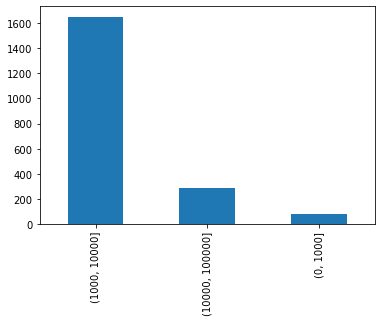

In [34]:
pd.cut(a, [0, 1000, 10000, 100000]).value_counts().plot.bar()